In [1]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
model = load_model("RESNET_50.keras")

In [3]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 7, 7, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_3           │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 71,445,262 (272.54 MB)

 Trainable params: 23,797,380 (90.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

 Optimizer params: 47,594,762 (181.56 MB)

## step_1 : loading the images

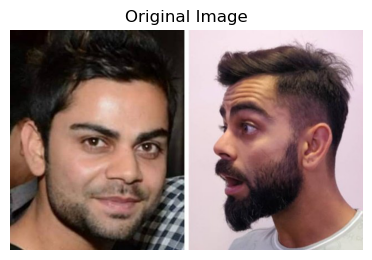

In [54]:
# Load the image using keras.preprocessing
img = image.load_img('../Downloads/Cricketer Image Dataset/images/virat_kohli/992126a605.jpg')  # You can add target_size=(224, 224) if needed
img_array = image.img_to_array(img)

# Parameters for Gaussian noise
#mean = 1
#std_dev = 30
#gaussian_noise = np.random.normal(mean, std_dev, img_array.shape)

# Add noise and clip values
#noisy_img = img_array + gaussian_noise
#noisy_img = np.clip(noisy_img, 0, 255).astype(np.uint8)

# Display original and noisy image
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(img_array.astype(np.uint8))
plt.axis('off')

'''plt.subplot(1, 2, 2)
   plt.title("Image with Gaussian Noise")
   plt.imshow(noisy_img)
   plt.axis('off')
   '''

plt.show()

## step _2 : preprocess the images

In [18]:
'''
  def preprocess_image(image, target_size=(224, 224,3)):
    # img = image.load_img(image_path, target_size=target_size)  # Load image
    img_array = image
    # Resize image if needed
    if img_array.shape != target_size:
        img_array = tf.image.resize(img_array, target_size[:2]).numpy()
    img_array = np.expand_dims(img_array, axis=0)  # Expand dims to match model input
    img_array = img_array / 255.0  # Normalize (optional, if needed by your model)
    return img_array
'''

In [55]:
def preprocess_image_with_path(image_path, target_size=(224, 224,3)):
    img = image.load_img(image_path, target_size=target_size)  # Load image
    img_array = image.img_to_array(img)  # Convert to numpy array
    img_array = np.expand_dims(img_array, axis=0)  # Expand dims to match model input
    img_array = img_array / 255.0  # Normalize (optional, if needed by your model)
    return img_array

In [ ]:
input_image = preprocess_image(img_array)
input_image_path=preprocess_image_with_path('../Downloads/Cricketer Image Dataset/images/virat_kohli/992126a605.jpg')
prediction = model.predict(input_image_path)[0] #Flatten output



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step


In [48]:
prediction

array([9.9671680e-01, 3.2789318e-03, 2.7781950e-06, 1.5125412e-06],
      dtype=float32)

## Step 3: Interpret the Prediction

In [49]:
# Define class labels (update this based on your dataset)
class_labels = ["Bacterial Blight", "Blast", "Brownspot","Tungro"]  

In [50]:
# Confidence threshold
threshold = 0.8
confidence = np.max(prediction)
predicted_index = np.argmax(prediction)

In [51]:
# Apply custom logic for unknown
if confidence >= threshold:
    predicted_class = class_labels[predicted_index]
else:
    predicted_class = "Not a recognized disease"

In [52]:
print(f"Prediction Probabilities: {prediction}")


Prediction Probabilities: [9.9671680e-01 3.2789318e-03 2.7781950e-06 1.5125412e-06]


In [53]:
# Output
print(f"Predicted Class: {predicted_class} (Confidence: {confidence:.2f})")

Predicted Class: Bacterial Blight (Confidence: 1.00)


In [45]:
# predicted_class = class_labels[np.argmax(prediction)]
# print("Predicted Class:", predicted_class)

In [14]:

'''
import numpy as np
predictions = model.predict(input_image)
predicted_class = np.argmax(predictions, axis=1)  # Get class index

print("Predicted class index:", predicted_class)
'''



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
Predicted class index: [1]
